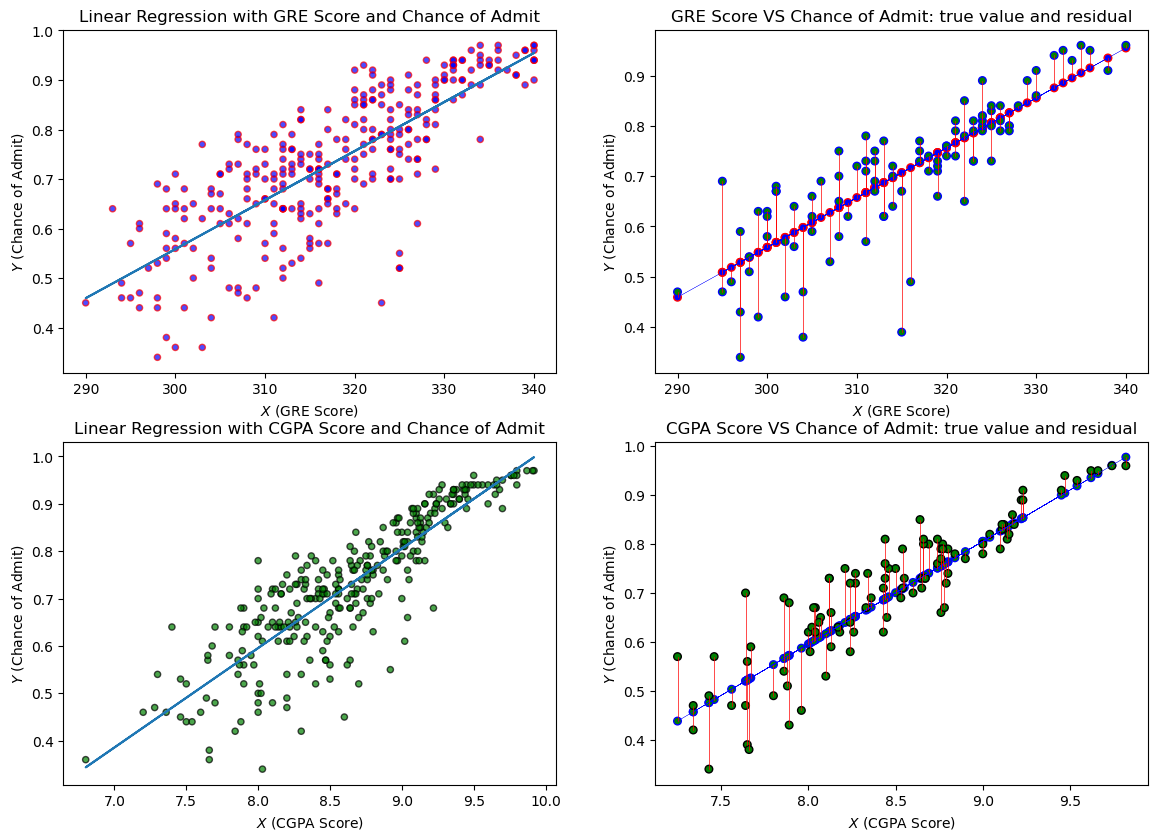

In [30]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd

%matplotlib inline

data = pd.read_csv('admission_predict.csv')
data.head()
train_data = data[0:300]
test_data = data[300:400]

#analysis between GRE Score vs Chance of Admit
train_X = train_data['GRE Score'].values
train_X = np.c_[train_X]
train_Y = train_data['Chance of Admit'].tolist()

test_X = test_data['GRE Score'].values
test_X = np.c_[test_X]
test_Y = test_data['Chance of Admit'].tolist()

from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(train_X, train_Y)
fig,ax = plt.subplots(nrows=2, ncols=2,figsize=(14,10), dpi=100)

# plot training data
scales = 20*np.ones(len(train_Y)) 
ax[0,0].scatter(train_X,train_Y,color='b',s=scales,alpha=0.7,edgecolor='r')
ax[0,0].set_xlabel('$X$ (GRE Score)')
ax[0,0].set_ylabel('$Y$ (Chance of Admit)')
ax[0,0].set_title('Linear Regression with GRE Score and Chance of Admit')

 # plot the regression line
train_Yhat = lr.predict(train_X) 
ax[0,0].plot(train_X,train_Yhat)

yhat_test = lr.predict(test_X)

# plot the predicted points along the prediction line
scales = 30*np.ones(len(test_X))
ax[0,1].scatter(test_X,yhat_test,s=scales,color='b',edgecolor='r') #predicted points
ax[0,1].plot(test_X,yhat_test,color='b',linewidth=.2) #prediction line
ax[0,1].set_xlabel('$X$ (GRE Score)')
ax[0,1].set_ylabel('$Y$ (Chance of Admit)')
ax[0,1].set_title('GRE Score VS Chance of Admit: true value and residual')
# plot the true values
scales = 30*np.ones(len(test_X))
ax[0,1].scatter(test_X,test_Y,s=scales,color='g',edgecolor='b') #test y: true value

# plot the residual line
# get all the x coordinate (test_X) from the test dataset
tmp = np.reshape(test_X,[1,len(test_X)])[0]


#print("test_X", test_X)
#print("np.reshape(test_X,[1,len(test_X)])", np.reshape(test_X,[1,len(test_X)]))
#print("tmp:",tmp)

tmp_x = []
tmp_y = []
for i in range(len(test_X)): #for each x in test set
    tmp_x = np.append(tmp_x,tmp[i]) #get x coordinate
    tmp_y = np.append(tmp_y,yhat_test[i]) #get predicted y coordinate
    tmp_x = np.append(tmp_x,tmp[i]) #get x coordinate again
    tmp_y = np.append(tmp_y,test_Y[i]) #get test y coordinate
    ax[0,1].plot(tmp_x,tmp_y,color='red',linewidth=0.5) #draw the vertical residual line (x,yhat), (x,test_y)
    tmp_x = []
    tmp_y = []
    
#analysis between CGPA Score vs Chance of Admit
train_X1 = train_data['CGPA'].values
train_X1 = np.c_[train_X1]
train_Y1 = train_data['Chance of Admit'].tolist()

test_X1 = test_data['CGPA'].values
test_X1 = np.c_[test_X1]
test_Y1 = test_data['Chance of Admit'].tolist()
#print (type(train_X))
#print (train_X.shape)
#print (type(train_Y))
from sklearn import linear_model
lr1 = linear_model.LinearRegression()
lr1.fit(train_X1, train_Y1)

# plot training data
scales = 20*np.ones(len(train_Y))
ax[1,0].scatter(train_X1,train_Y1,color='g',s=scales,alpha=0.7,edgecolor='black')
ax[1,0].set_xlabel('$X$ (CGPA Score)')
ax[1,0].set_ylabel('$Y$ (Chance of Admit)')
ax[1,0].set_title('Linear Regression with CGPA Score and Chance of Admit')

# plot the regression line
train_Yhat1 = lr1.predict(train_X1)
ax[1,0].plot(train_X1,train_Yhat1)

yhat_test1 = lr1.predict(test_X1)

# plot the predicted points along the prediction line
scales = 30*np.ones(len(test_X1))
ax[1,1].scatter(test_X1,yhat_test1,s=scales,color='g',edgecolor='b') #predicted points
ax[1,1].plot(test_X1,yhat_test1,color='b',linewidth=.2) #prediction line
ax[1,1].set_xlabel('$X$ (CGPA Score)')
ax[1,1].set_ylabel('$Y$ (Chance of Admit)')
ax[1,1].set_title('CGPA Score VS Chance of Admit: true value and residual')
# plot the true values
scales = 30*np.ones(len(test_X1))
ax[1,1].scatter(test_X1,test_Y1,s=scales,color='g',edgecolor='black') #test y: true value

# plot the residual line
# get all the x coordinate (test_X) from the test dataset
tmp1 = np.reshape(test_X1,[1,len(test_X1)])[0]

#print("test_X", test_X)
#print("np.reshape(test_X,[1,len(test_X)])", np.reshape(test_X,[1,len(test_X)]))
#print("tmp:",tmp)

tmp_x1 = []
tmp_y1 = []
for i in range(len(test_X1)): #for each x in test set
    tmp_x1 = np.append(tmp_x1,tmp1[i]) #get x coordinate
    tmp_y1 = np.append(tmp_y1,yhat_test1[i]) #get predicted y coordinate
    tmp_x1 = np.append(tmp_x1,tmp1[i]) #get x coordinate again
    tmp_y1 = np.append(tmp_y1,test_Y1[i]) #get test y coordinate
    ax[1,1].plot(tmp_x1,tmp_y1,color='red',linewidth=0.5) #draw the vertical residual line (x,yhat), (x,test_y)
    tmp_x1 = []
    tmp_y1 = []